# **` Customer Churn Data :`**

Each row represents a customer, each column contains customer’s attributes
described on the column Metadata.

The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet,
online security, online backup, device protection, tech support, and streaming TV and movies
## **`Customer account information`** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

## **`Demographic info about customers`** – gender, age range, and if they have partners and dependents

### **`Business objective of this exercise :`**

Analyze customer data to understand reason for churn and who could be the next
potential customer to leave the company ?
What contributes to the higher churn rate of customer and what could be some of the probable solution to address the same ?
What type of problem is it ?

# **`Business Questions`**

- what is the ratio between males and females in our company?
- what is the ratio between Senior Citizens and others in our company?
- what is the ratio between who has partners and not in our company?
- what is the ratio between who has dependents and not in our company?
- what is the ratio between who has MultipleLines and not in our company?
- Depending on the correlation matrix, which variables have a strong relationship with each other?
- From the previous question,What is the relationship between the Internet Services and the churn rate?
- how many Internet Services we provide in our company? - list names and ratio please -
- what is our Contract types we provide? - names and ratio please-
- how many customers uses StreamingTV ?
- what is the ratio between users who streaming movies to StreamingTV subscribers?
- Is there a strong relationship between the monthly recharge rate and the dependents?
- who is the the most important customer in the company according to Monthly and Total charges?
- how many payment methods we provide? and what is the ratio between each others?
- what is our churn rate?
- what is the average monthly charge?
- From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?
-------
- We want to give offers according to the monthly charge categories, can you explain that?
- We want to present offers by gender and the Partner, could you explain that?

#استدعاء **المكتبات**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#قرأة **الملف**

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# **استكشاف البيانات**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# تصحيح  الخطأ في نوع الاعمدة

[MonthlyCharges و TotalCharges]



In [ ]:
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
num = data.select_dtypes(include=['number'])
print(num)
print("____________________________________")
non_num = data.select_dtypes(exclude=['number'])
print(non_num)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]
____________________________________
      customerID  gender Partner Dependents PhoneService     MultipleLines  \
0     7590-VHVEG  Female     Yes         No           No  No phone service   
1     5575-GNVDE    Male      No         No          Yes                No   
2     36

In [ ]:
for i in data.columns:
  x = data[i].value_counts()
  print(x)
  print()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet serv

# **استخراج الفئات المميزة من اجل تحليل التصوير البياني**

In [ ]:
cat = data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
         'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

cat

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 17 columns]

In [ ]:
for i in cat.columns:
  x = cat[i].value_counts()
  print(x)
  print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    15

In [ ]:
cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
sns.set_theme(style="darkgrid")

#1- what is the ratio between males and females in our company?


#    **حساب النسبة المئوية بين الذكور و الاناث**

In [ ]:

gender_counts = data['gender'].value_counts(normalize=True) * 100
print("Percentage of male and female customers:\n", gender_counts)

Percentage of male and female customers:
 gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64


# **مخطط التوزيع (Pie Chart):**

# **ليكشف عن نسبة الذكور إلى الإناث في الشركة**

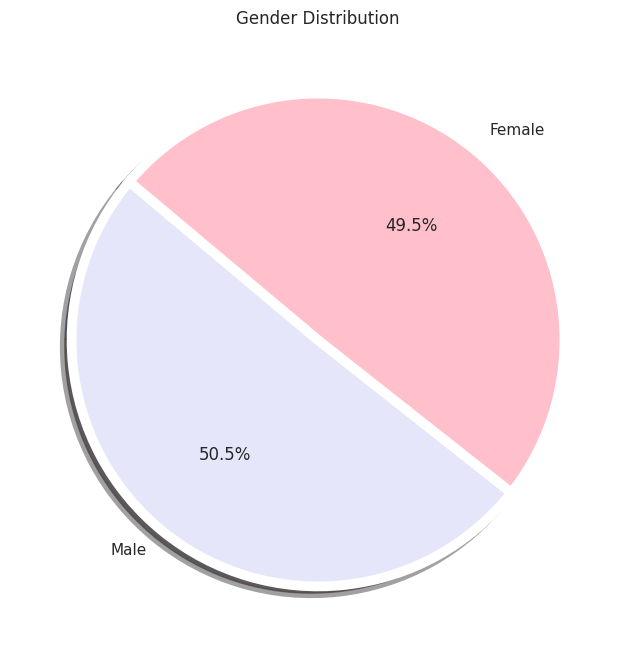

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie([49.5,50.5],shadow=True^8)
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'pink'], shadow=True^10, wedgeprops={'edgecolor': 'white', 'linewidth': 7})

plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Male ratio : 50.5 %

Female ratio : 49.5 %

# **مخطط القيم (Bar Plot):**


# **عدد العملاء حسب الجنس وحالة التراجع**

# رسم مخطط توزيع العملاء حسب الجنس مع تمييز حالة التراجع فقط


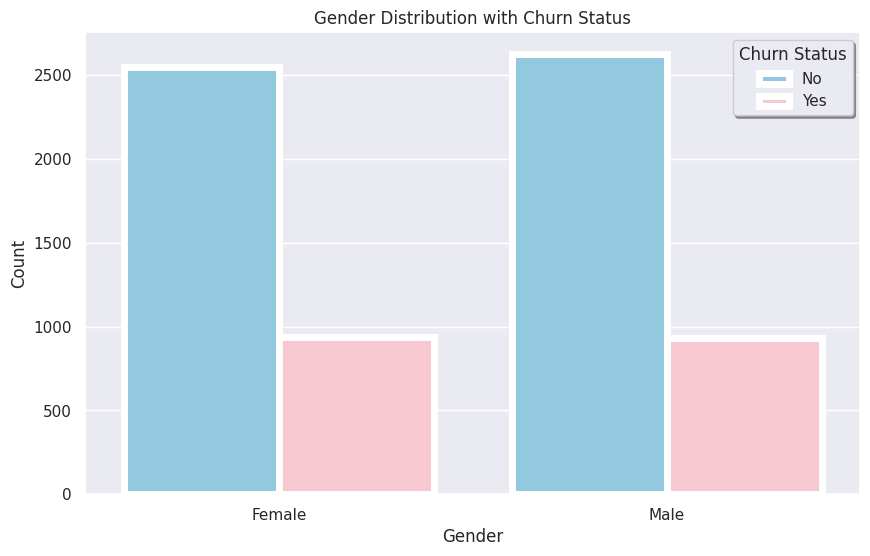

In [ ]:


plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='Churn', palette=['skyblue', 'pink'], edgecolor='white',dodge=True, linewidth=5)

plt.title('Gender Distribution with Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

 # 2-what is the ratio between Senior Citizens and others in our company ?

# حساب النسبة المئوية لكبار السن وغيرهم


In [ ]:
senior_counts = data['SeniorCitizen'].value_counts(normalize=True) * 100
print("Percentage of Senior Citizens and others:\n", senior_counts)

Percentage of Senior Citizens and others:
 SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64


# **Pie Plot**
# رسم المخطط الدائري لتوزيع كبار السن وغيرهم


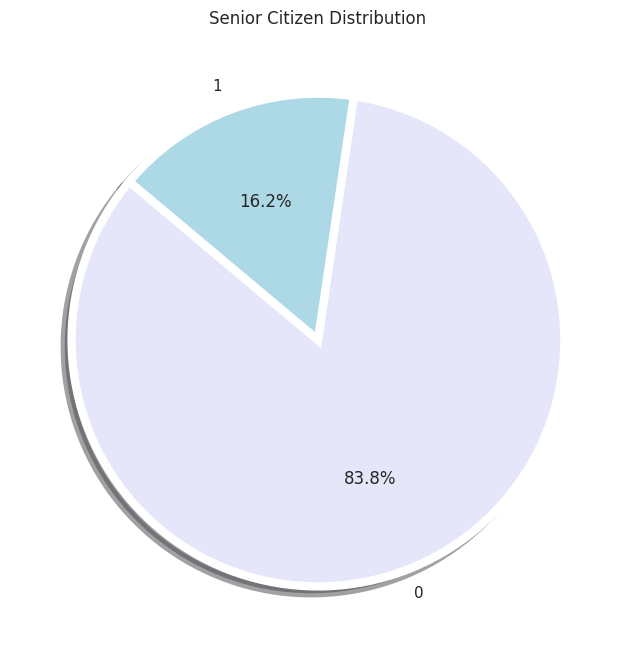

In [ ]:
plt.figure(figsize=(8, 8))
senior_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'lightblue'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 6})
plt.title('Senior Citizen Distribution')
plt.ylabel('')
plt.show()

 SeniorCitizen ratio is 16.2 %

 non-SeniorCitizen ratio is 83.8 %


#**Bar Plot**

# توزيع العملاء حسب فئة العمر (كبار السن وغيرهم)
# مع توضيح التراجع



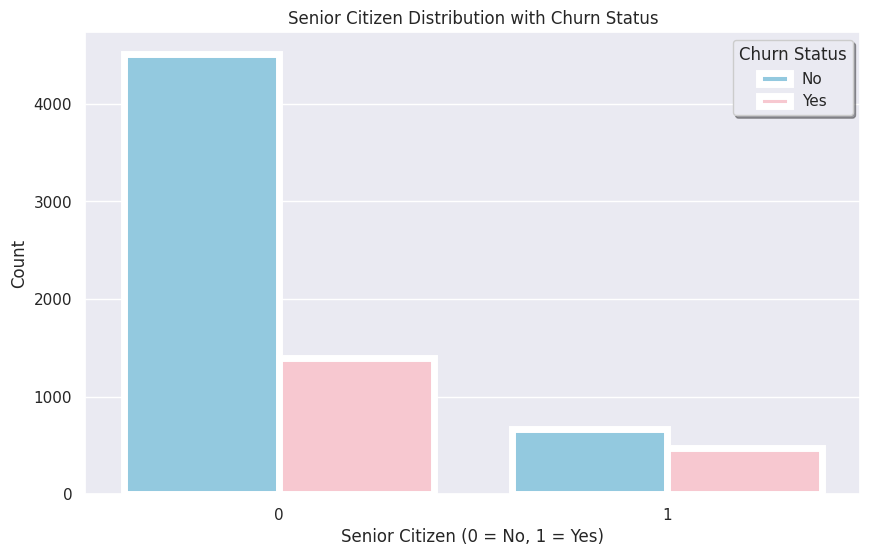

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'pink'])

plt.title('Senior Citizen Distribution with Churn Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 3-what is the ratio between who has partners and not in our company?



#حساب النسبة المئوية لمن لديهم شركاء ومن ليس لديهم شركاء :


In [ ]:
partner_counts = data['Partner'].value_counts(normalize=True) * 100
print("Percentage of customers with and without partners:\n", partner_counts)

Percentage of customers with and without partners:
 Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64



#**Pie** **Chart**

# رسم المخطط الدائري لتوزيع العملاء حسب وجود شريك من عدمه


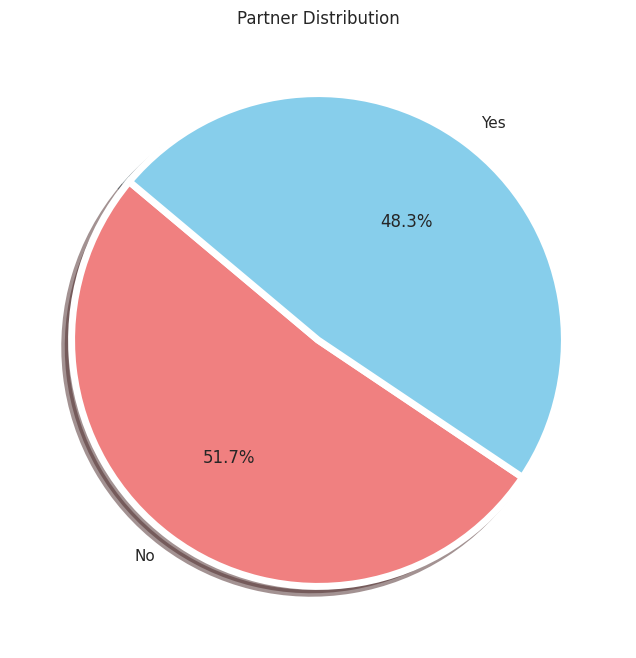

In [ ]:
plt.figure(figsize=(8, 8))
partner_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 5})
plt.title('Partner Distribution')
plt.ylabel('')
plt.show()

# **مخطط القيم (Bar Plot):**

# توزيع العملاء حسب وجود شريك مع توضيح التراجع


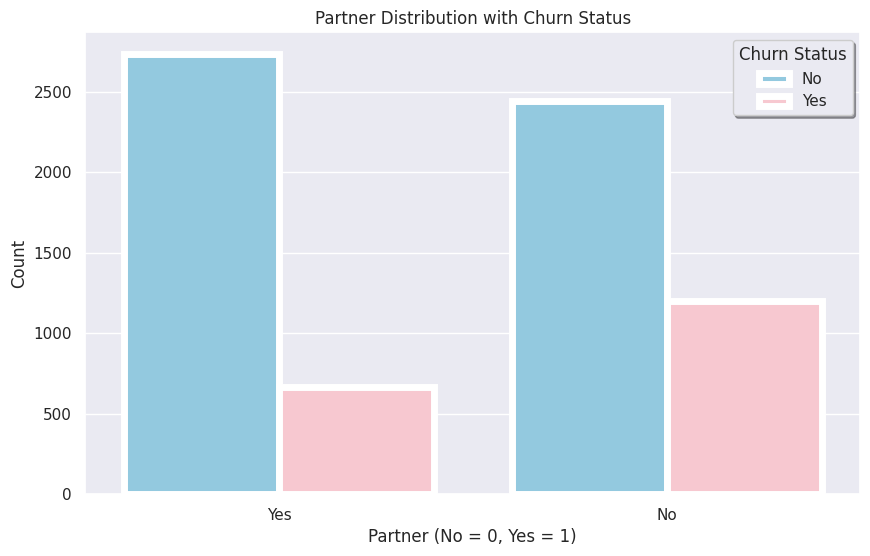

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Partner', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'pink'])
plt.title('Partner Distribution with Churn Status')
plt.xlabel('Partner (No = 0, Yes = 1)')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

Partner rtio is 48.3 %

not_partner ratio is 51.7 %

 # 4- what is the ratio between who has dependents and not in our company ?


# حساب النسبة المئوية لمن لديهم معالين ومن ليس لديهم


In [ ]:
dependents_counts = data['Dependents'].value_counts(normalize=True) * 100
print("Percentage of customers with and without dependents:\n", dependents_counts)

Percentage of customers with and without dependents:
 Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64


#**Pie Plot**

# المخطط الدائري لتوزيع العملاء حسب وجود معالين من عدمه


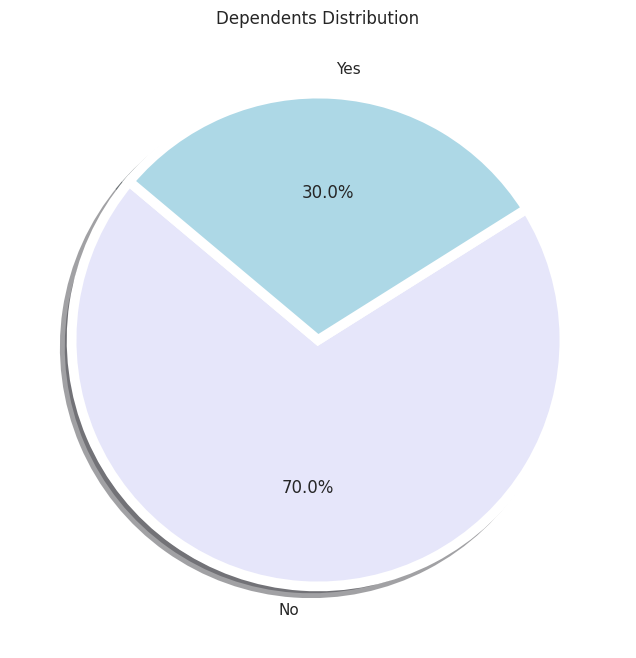

In [ ]:
plt.figure(figsize=(8, 8))
dependents_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'lightblue'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':7})
plt.title('Dependents Distribution')
plt.ylabel('')
plt.show()



# **Bar Plot:**

# توزيع العملاء حسب وجود معالين مع توضيح التراجع




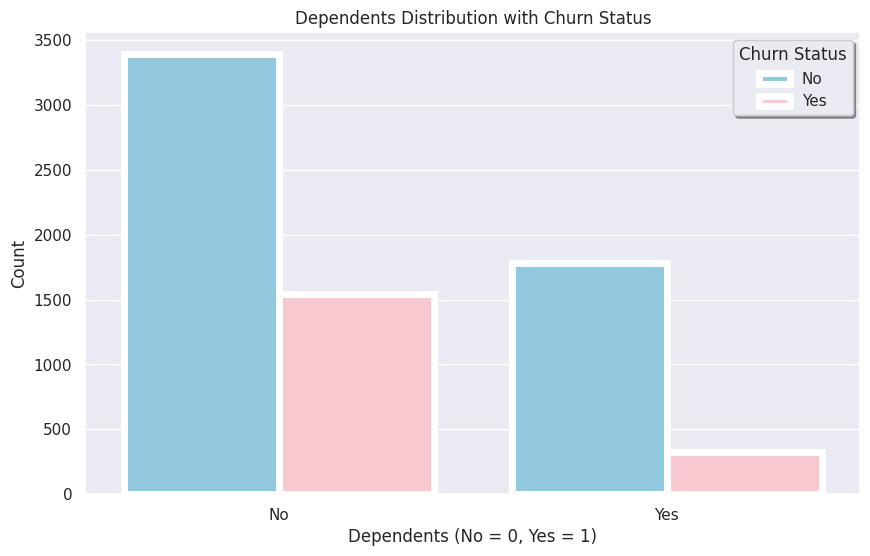

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Dependents', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'pink'])
plt.title('Dependents Distribution with Churn Status')
plt.xlabel('Dependents (No = 0, Yes = 1)')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

Dependents is 30 %

not_Dependents 70 %

# 5- what is the ratio between who has MultipleLines and not in our company ?


# حساب النسبة المئوية لمن لديهم خطوط متعددة، من ليس لديهم، ومن ليس لديهم خدمة الهاتف


In [ ]:
multiple_lines_counts = data['MultipleLines'].value_counts(normalize=True) * 100
print("Percentage of customers with and without multiple lines:\n", multiple_lines_counts)

Percentage of customers with and without multiple lines:
 MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64


# رسم المخطط الدائري لتوزيع العملاء حسب وجود خطوط متعددة من عدمه


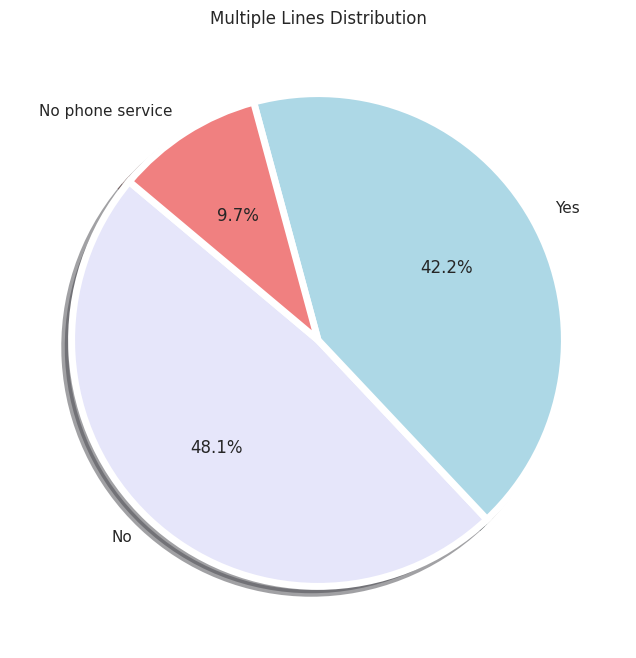

In [ ]:
plt.figure(figsize=(8, 8))
multiple_lines_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'lightblue', 'lightcoral'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':5})
plt.title('Multiple Lines Distribution')
plt.ylabel('')
plt.show()

MultipleLines is 42.2 %

not_MultipleLines is 48.1 %


# **Bar Plot:**

# توزيع العملاء حسب وجود خطوط متعددة مع توضيح التراجع


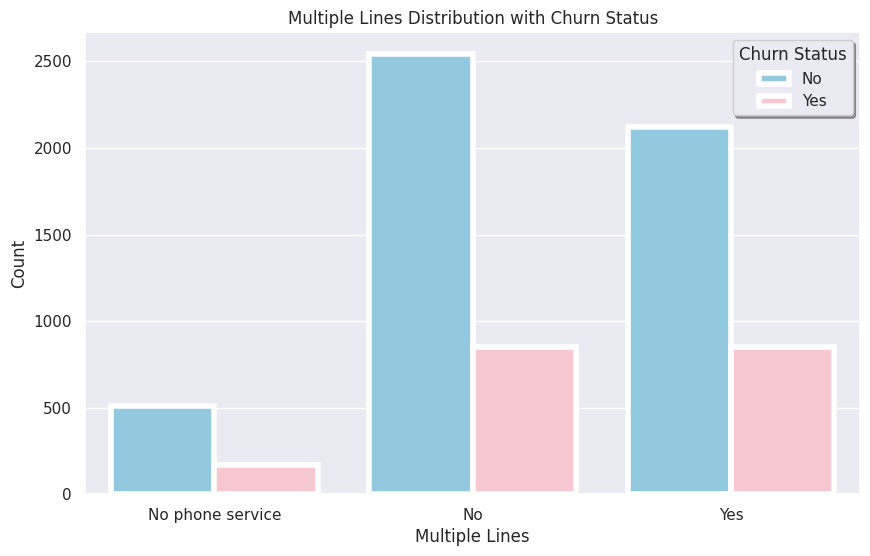

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MultipleLines', hue='Churn', dodge=True, edgecolor='white', linewidth=4, palette=['skyblue', 'pink'])


plt.title('Multiple Lines Distribution with Churn Status')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 6-Depending on the correlation matrix, which variables have a strong relationship with each other ?


In [ ]:
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
num = data.select_dtypes(['int64','float64'])
correlation_matrix = num.corr()
correlation_matrix

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000

<Axes: >

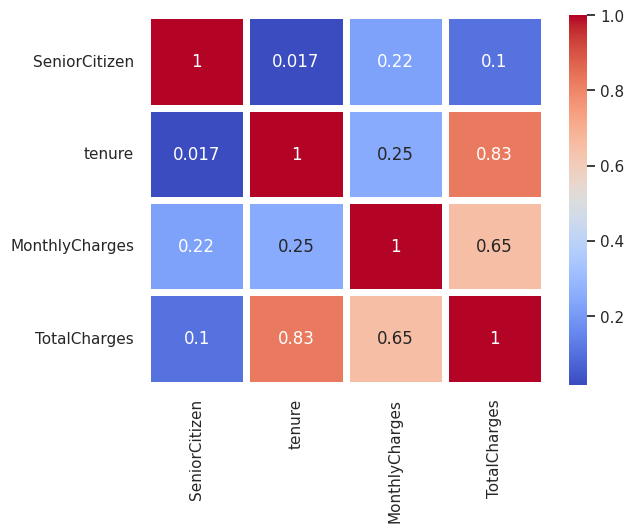

In [ ]:
sns.heatmap(correlation_matrix , annot = True,cmap="coolwarm", linewidths=5)

 1- SeniorCitizen and TotalCharges have a the strongest relationship with

 each other === 1

2- tenure and TotalCharges have a strong relationship with each other ===

0.83


3-MonthlyCharges and TotalCharges have a strong relationship with each other


==== 0.65


# **Correlation matrix**

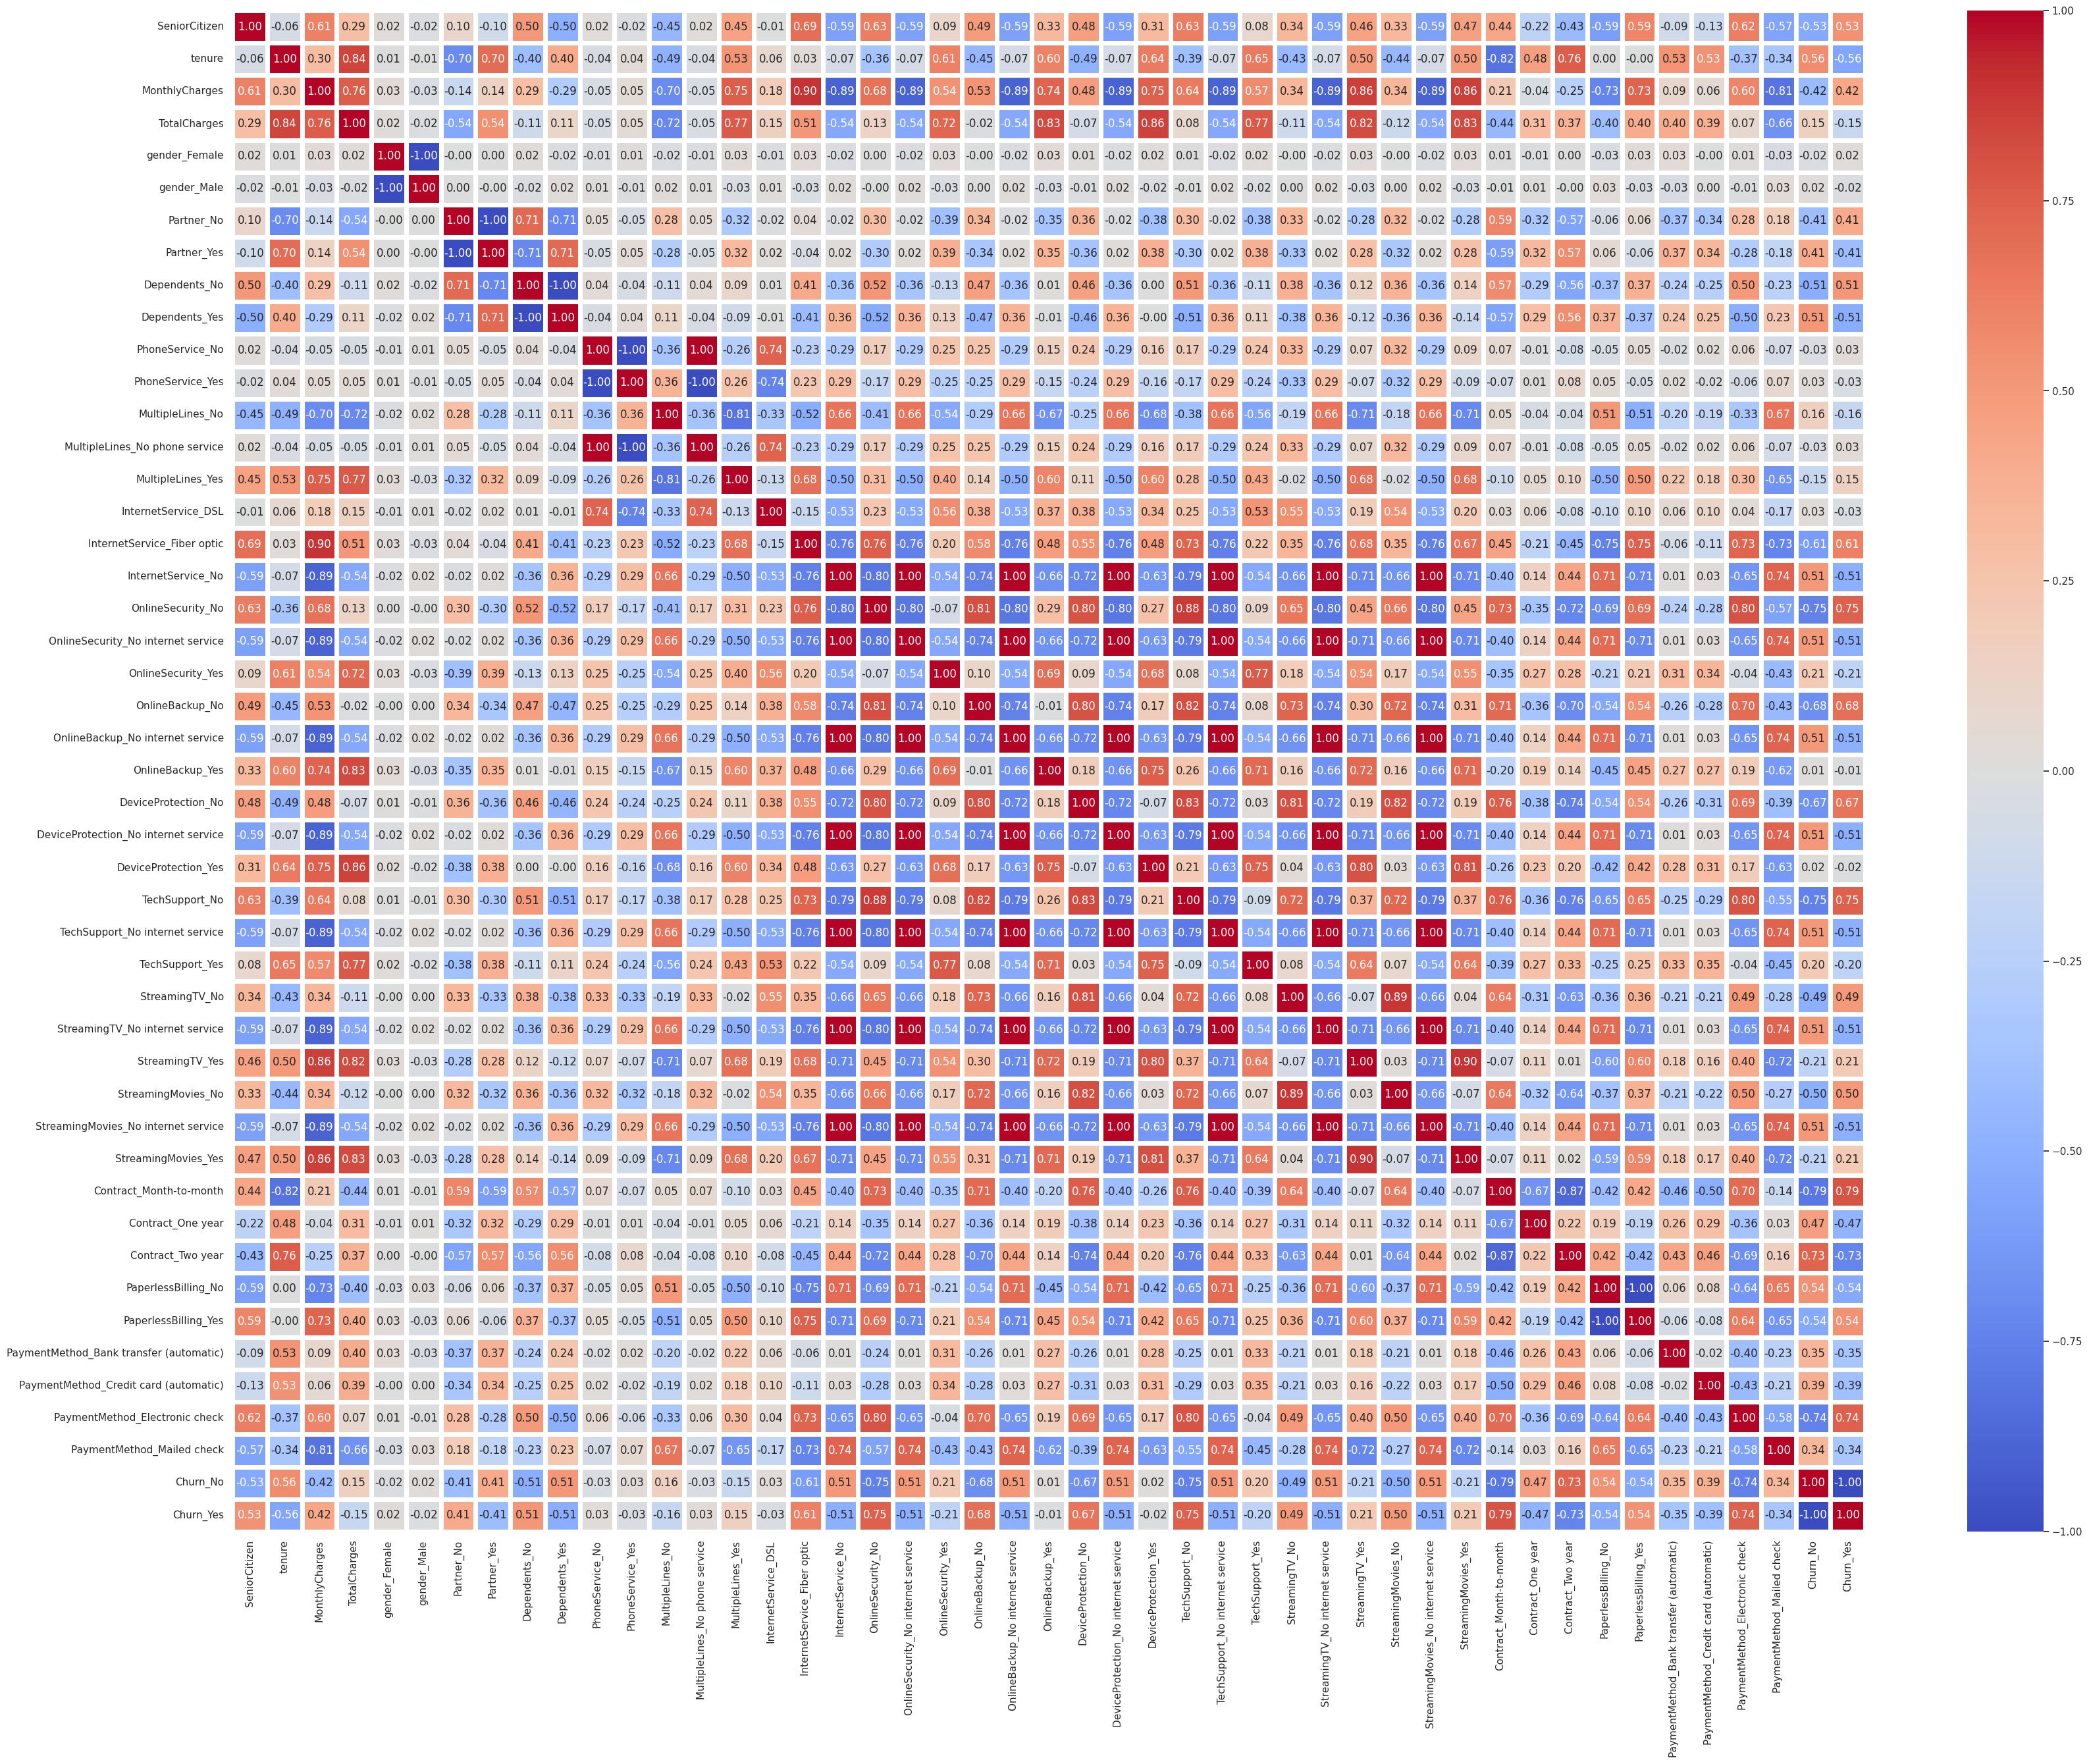

In [ ]:
data_copy = data.copy()

data_copy = data_copy.drop(columns=['customerID'])

data_copy = pd.get_dummies(data_copy, drop_first=False)

correlation_matrix = data_copy.corr()

plt.figure(figsize=(40,30))
sns.heatmap(correlation_matrix.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=5)
plt.show()


In [ ]:
# @title


# تحويل مصفوفة الارتباط إلى شكل مسطح لفرز القيم
correlation_flat = correlation_matrix.unstack().reset_index()
correlation_flat.columns = ['Variable1', 'Variable2', 'Correlation']
correlation_flat = correlation_flat[correlation_flat['Variable1'] != correlation_flat['Variable2']]

# استخراج الجداول المطلوبة
# الجداول السلبية بترتيب تنازلي
negative_correlations = correlation_flat[correlation_flat['Correlation'] < 0].sort_values(by='Correlation')

# الجداول الإيجابية بترتيب تنازلي
positive_correlations = correlation_flat[correlation_flat['Correlation'] > 0].sort_values(by='Correlation', ascending=False)

# ارتباط الذكور والإناث
if 'gender_Male' in correlation_matrix.columns:
    gender_male_correlations = correlation_matrix['gender_Male'].sort_values(ascending=False).drop('gender_Male')
    gender_female_correlations = -gender_male_correlations  # باستخدام العكس لاستنتاج الإناث
else:
    gender_male_correlations = pd.Series([], dtype="float64")
    gender_female_correlations = pd.Series([], dtype="float64")

# ارتباط Churn_Yes مع المتغيرات التي تحتوي على "Yes" و"No"
if 'Churn_Yes' in correlation_matrix.columns:
    churn_yes_correlations = correlation_matrix['Churn_Yes'].filter(regex="Yes").sort_values(ascending=False)
    churn_no_correlations = correlation_matrix['Churn_Yes'].filter(regex="No").sort_values(ascending=False)
else:
    churn_yes_correlations = pd.Series([], dtype="float64")
    churn_no_correlations = pd.Series([], dtype="float64")

In [ ]:
# @title
from IPython.display import display, Markdown

# عرض الجداول بترتيب Markdown
display(Markdown("### Negative Correlations Sorted Descending"))
display(negative_correlations)

display(Markdown("### Positive Correlations Sorted Descending"))
display(positive_correlations)

display(Markdown("### Correlations for Male Gender (Descending)"))
display(gender_male_correlations)

display(Markdown("### Correlations for Female Gender (Descending)"))
display(gender_female_correlations)

display(Markdown("### Churn Yes Correlations Sorted Descending"))
display(churn_yes_correlations)

display(Markdown("### Churn No Correlations Sorted Descending"))
display(churn_no_correlations)

### Negative Correlations Sorted Descending

Variable1                    Variable2  Correlation
2207                   Churn_Yes                     Churn_No    -1.000000
2161                    Churn_No                    Churn_Yes    -1.000000
239                  gender_Male                gender_Female    -1.000000
193                gender_Female                  gender_Male    -1.000000
481              PhoneService_No             PhoneService_Yes    -1.000000
...                          ...                          ...          ...
298                   Partner_No  InternetService_Fiber optic    -0.000304
1783           Contract_One year   PaymentMethod_Mailed check    -0.000116
2105  PaymentMethod_Mailed check            Contract_One year    -0.000116
191                gender_Female                 TotalCharges    -0.000048
145                 TotalCharges                gender_Female    -0.000048

[1126 rows x 3 columns]

### Positive Correlations Sorted Descending

Variable1  \
918     OnlineSecurity_No internet service   
824                     InternetService_No   
1629   StreamingMovies_No internet service   
621         MultipleLines_No phone service   
1209  DeviceProtection_No internet service   
...                                    ...   
900     OnlineSecurity_No internet service   
345                            Partner_Yes   
759            InternetService_Fiber optic   
238                            gender_Male   
146                           TotalCharges   

                                 Variable2  Correlation  
918   DeviceProtection_No internet service     1.000000  
824   DeviceProtection_No internet service     1.000000  
1629       StreamingTV_No internet service     1.000000  
621                        PhoneService_No     1.000000  
1209   StreamingMovies_No internet service     1.000000  
...                                    ...          ...  
900                            Partner_Yes     0.000615  
345            InternetService_Fiber optic     0.000304  
759                            Partner_Yes     0.000304  
238                           TotalCharges     0.000048  
146                            gender_Male     0.000048  

[1036 rows x 3 columns]

### Correlations for Male Gender (Descending)

PaymentMethod_Mailed check                 0.013744
PaperlessBilling_No                        0.011754
Dependents_Yes                             0.010517
OnlineSecurity_No                          0.010429
Churn_No                                   0.008612
OnlineBackup_No                            0.008191
Contract_One year                          0.008026
InternetService_DSL                        0.006568
PhoneService_No                            0.006488
MultipleLines_No phone service             0.006488
OnlineBackup_No internet service           0.006026
TechSupport_No internet service            0.006026
StreamingMovies_No internet service        0.006026
DeviceProtection_No internet service       0.006026
InternetService_No                         0.006026
StreamingTV_No internet service            0.006026
OnlineSecurity_No internet service         0.006026
StreamingMovies_No                         0.005374
tenure                                     0.005106
MultipleLines_No                           0.004476
TechSupport_No                             0.003397
StreamingTV_No                             0.003267
Partner_No                                 0.001808
PaymentMethod_Credit card (automatic)      0.001215
PaymentMethod_Electronic check             0.000752
TotalCharges                               0.000048
Partner_Yes                               -0.001808
SeniorCitizen                             -0.001874
DeviceProtection_Yes                      -0.002105
DeviceProtection_No                       -0.002988
Contract_Month-to-month                   -0.003386
Contract_Two year                         -0.003695
PhoneService_Yes                          -0.006488
StreamingTV_Yes                           -0.008393
MultipleLines_Yes                         -0.008414
Churn_Yes                                 -0.008612
TechSupport_Yes                           -0.009212
StreamingMovies_Yes                       -0.010487
Dependents_No                             -0.010517
InternetService_Fiber optic               -0.011286
PaperlessBilling_Yes                      -0.011754
OnlineBackup_Yes                          -0.013773
MonthlyCharges                            -0.014569
PaymentMethod_Bank transfer (automatic)   -0.016024
OnlineSecurity_Yes                        -0.017021
gender_Female                             -1.000000
Name: gender_Male, dtype: float64

### Correlations for Female Gender (Descending)

PaymentMethod_Mailed check                -0.013744
PaperlessBilling_No                       -0.011754
Dependents_Yes                            -0.010517
OnlineSecurity_No                         -0.010429
Churn_No                                  -0.008612
OnlineBackup_No                           -0.008191
Contract_One year                         -0.008026
InternetService_DSL                       -0.006568
PhoneService_No                           -0.006488
MultipleLines_No phone service            -0.006488
OnlineBackup_No internet service          -0.006026
TechSupport_No internet service           -0.006026
StreamingMovies_No internet service       -0.006026
DeviceProtection_No internet service      -0.006026
InternetService_No                        -0.006026
StreamingTV_No internet service           -0.006026
OnlineSecurity_No internet service        -0.006026
StreamingMovies_No                        -0.005374
tenure                                    -0.005106
MultipleLines_No                          -0.004476
TechSupport_No                            -0.003397
StreamingTV_No                            -0.003267
Partner_No                                -0.001808
PaymentMethod_Credit card (automatic)     -0.001215
PaymentMethod_Electronic check            -0.000752
TotalCharges                              -0.000048
Partner_Yes                                0.001808
SeniorCitizen                              0.001874
DeviceProtection_Yes                       0.002105
DeviceProtection_No                        0.002988
Contract_Month-to-month                    0.003386
Contract_Two year                          0.003695
PhoneService_Yes                           0.006488
StreamingTV_Yes                            0.008393
MultipleLines_Yes                          0.008414
Churn_Yes                                  0.008612
TechSupport_Yes                            0.009212
StreamingMovies_Yes                        0.010487
Dependents_No                              0.010517
InternetService_Fiber optic                0.011286
PaperlessBilling_Yes                       0.011754
OnlineBackup_Yes                           0.013773
MonthlyCharges                             0.014569
PaymentMethod_Bank transfer (automatic)    0.016024
OnlineSecurity_Yes                         0.017021
gender_Female                              1.000000
Name: gender_Male, dtype: float64

### Churn Yes Correlations Sorted Descending

Churn_Yes               1.000000
PaperlessBilling_Yes    0.191825
StreamingTV_Yes         0.063228
StreamingMovies_Yes     0.061382
MultipleLines_Yes       0.040102
PhoneService_Yes        0.011942
DeviceProtection_Yes   -0.066160
OnlineBackup_Yes       -0.082255
Partner_Yes            -0.150448
Dependents_Yes         -0.164221
TechSupport_Yes        -0.164674
OnlineSecurity_Yes     -0.171226
Name: Churn_Yes, dtype: float64

### Churn No Correlations Sorted Descending

OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
OnlineBackup_No                         0.268005
DeviceProtection_No                     0.252481
Dependents_No                           0.164221
Partner_No                              0.150448
StreamingMovies_No                      0.130845
StreamingTV_No                          0.128916
MultipleLines_No phone service         -0.011942
PhoneService_No                        -0.011942
MultipleLines_No                       -0.032569
PaperlessBilling_No                    -0.191825
InternetService_No                     -0.227890
OnlineSecurity_No internet service     -0.227890
OnlineBackup_No internet service       -0.227890
DeviceProtection_No internet service   -0.227890
TechSupport_No internet service        -0.227890
StreamingTV_No internet service        -0.227890
StreamingMovies_No internet service    -0.227890
Churn_No                               -1.000000
Name: Churn_Yes, dtype: float64

`العوامل التي تسهم في بقاء العملاء أو رحيلهم لتحليل هذه العوامل من جدول “نعم `

# و

 `لا”`

 `اقدم التوصيات التالية:`

التحليل:

 1. الخدمات المقدمة والتراجع:
 • العملاء الذين لديهم خدمات الأمان عبر الإنترنت والدعم الفني (OnlineSecurity_Yes و TechSupport_Yes) يميلون إلى البقاء أكثر. هذا يشير إلى أن العملاء الذين يشعرون بأمان أكبر ويحصلون على دعم جيد هم أقل ميلًا لإلغاء الخدمة.
 • العملاء الذين ليس لديهم هذه الخدمات (OnlineSecurity_No و TechSupport_No) لديهم معدل تراجع أعلى.
 2. التواصل الرقمي والتراجع:
 • الفوترة الإلكترونية (PaperlessBilling_Yes) ترتبط بمعدل تراجع أعلى، مما قد يعكس عدم رضا عند بعض العملاء مع الأنظمة الرقمية أو قضايا متعلقة بالفوترة.
 3. التعلق بالخدمة والتراجع:
 • العملاء بدون شركاء (Partner_No) و بدون معالين (Dependents_No) يظهرون معدلات تراجع أعلى، مما يوحي بأن وجود التزامات أو علاقات قد يكون عاملًا في بقاء العملاء.

التوصيات:

 1. تعزيز الخدمات الأمنية والدعم:
 • تقديم حزم محسنة للأمان والدعم الفني قد يكون استراتيجية فعالة لتحسين رضا العملاء والحد من التراجع.
 2. تحسين تجربة الفوترة الإلكترونية:
 • إجراء استبيانات لرصد رضا العملاء حول الفوترة الإلكترونية وتحديد المشكلات والعمل على حلها.
 3. برامج الولاء والمكافآت:
 • تطوير برامج لولاء العملاء تستهدف الأفراد بدون شركاء أو معالين، مثل تقديم خصومات أو مزايا إضافية تعزز التعلق بالخدمة.
 4. التعليم والتوعية حول فوائد الخدمات:
 • تنظيم حملات تعريفية حول كيفية استفادة العملاء من خدمات الأمان والدعم الفني لزيادة الإقبال على هذه الخدمات.

بتطبيق هذه التوصيات، يمكنك تحسين رضا العملاء وخفض معدلات التراجع في شرك


تمامًا، تُظهر البيانات رؤى مهمة حول العوامل المؤثرة في احتمال ترك العملاء للخدمات

Churn Yes Correlations Sorted Descending:

 1. PaperlessBilling_Yes (0.191825): الفوترة الإلكترونية مرتبطة بشكل إيجابي بالتراجع، ما يعني أن العملاء الذين يفضلون الفوترة الإلكترونية أكثر ميلاً للتراجع.
 2. StreamingTV_Yes و StreamingMovies_Yes: هذه الخدمات مرتبطة ضعيفة بالتراجع، مما يعني أنها قد تكون عوامل جذب بسيطة للعملاء لكنها لا تحمي بالضرورة ضد التراجع.
 3. TechSupport_Yes و OnlineSecurity_Yes: العملاء الذين لديهم هذه الخدمات أقل ميلاً للتراجع، ما يشير إلى أهمية الأمان والدعم الفني في الاحتفاظ بالعملاء.

Churn No Correlations Sorted Descending:

 1. OnlineSecurity_No و TechSupport_No لها ارتباطات قوية مع التراجع، ما يعني أن النقص في هذه الخدمات يزيد بشكل كبير من احتمال التراجع.
 2. InternetService_No و OnlineBackup_No وغيرها من الخدمات المتعلقة بالأمان والنسخ الاحتياطي تظهر أيضاً ارتباطات قوية بالتراجع، مما يدعم الفكرة القائلة بأن تعزيز هذه الجوانب قد يساعد في تحسين الاحتفاظ بالعملاء.

توصيات:

 1. تحسين خدمات الأمان والدعم الفني: تقديم حلول أمان محسنة ودعم فني موثوق به يمكن أن يقلل من معدلات التراجع.
 2. إعادة تقييم خيارات الفوترة الإلكترونية: بما أن الفوترة الإلكترونية مرتبطة بارتفاع التراجع، يمكن دراسة سبب هذه الظاهرة وتحسين تجربة العملاء مع هذه النظام.
 3. تعزيز خدمات البث التلفزيوني والأفلام: مع العلاقة الإيجابية الضعيفة لهذه الخدمات بالتراجع، يمكن العمل على تحسينها وترويجها كجزء من استراتيجية الاحتفاظ بالعملاء.

كل هذه النتائج تشير إلى أهمية التركيز على جودة الخدمة وتوفير خيارات تلبي احتياجات العملاء بشكل فعال للحد من التراجع.

# 7-From the previous question,What is the relationship between the Internet

#Services and the churn rate ?

# حساب توزيع العملاء حسب نوع خدمة الإنترنت وحالة التراجع


In [ ]:
internet_churn_counts = data.groupby(['InternetService', 'Churn']).size().unstack()
print("Distribution of customers by Internet Service and Churn:\n", internet_churn_counts)

Distribution of customers by Internet Service and Churn:
 Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


# حساب النسبة المئوية للتراجع حسب نوع خدمة الإنترنت


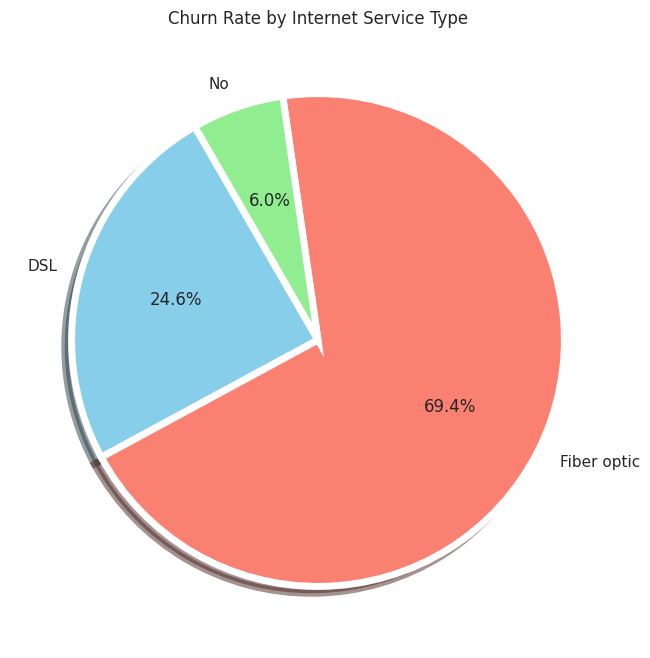

In [ ]:
churn_by_internet = data[data['Churn'] == 'Yes'].groupby('InternetService').size()
plt.figure(figsize=(8, 8))
churn_by_internet.plot(kind='pie', autopct='%1.1f%%', startangle=120, colors=['skyblue', 'salmon', 'lightgreen'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':5})
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('')
plt.show()

# **Bar Plot:**

# توزيع العملاء حسب نوع خدمة الإنترنت مع توضيح التراجع



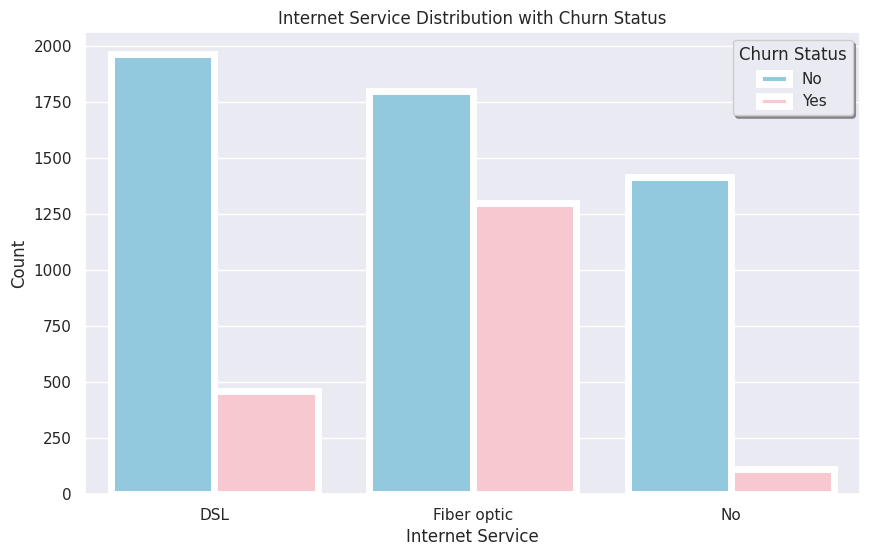

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'pink'])

plt.title('Internet Service Distribution with Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 8- how many Internet Services we provide in our company? - list names and
#ratio please -?


# حساب عدد ونسبة العملاء حسب نوع خدمة الإنترنت


In [ ]:
internet_service_counts = data['InternetService'].value_counts(normalize=True) * 100
print("Internet Service Types and their percentages:\n", internet_service_counts)

Internet Service Types and their percentages:
 InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64


# رسم المخطط الدائري لتوزيع خدمات الإنترنت

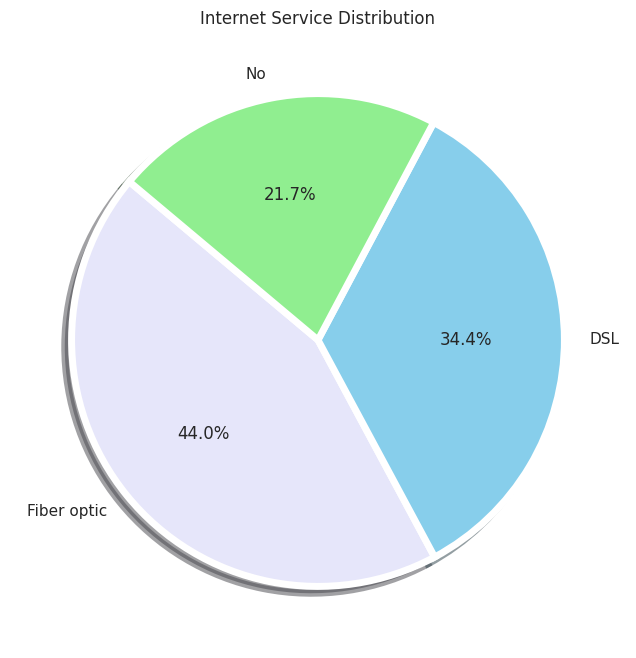

In [ ]:
plt.figure(figsize=(8, 8))
internet_service_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'skyblue', 'lightgreen'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':5})
plt.title('Internet Service Distribution')
plt.ylabel('')
plt.show()

# **Bar Plot**

# توزيع العملاء حسب نوع خدمة الإنترنت مع توضيح التراجع


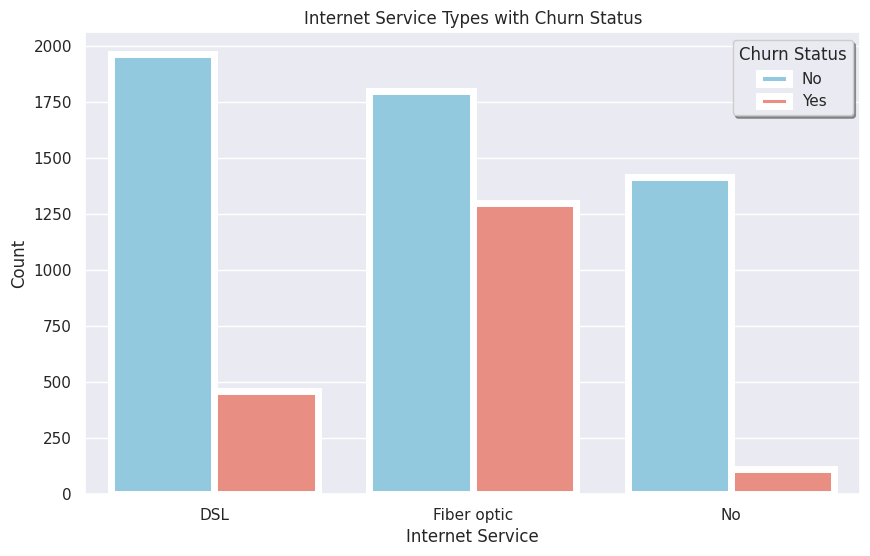

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'salmon'])

plt.title('Internet Service Types with Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# توزيع العملاء حسب نوع خدمة الإنترنت مع توضيح التراجع باستخدام مخطط الشريط الأفقي


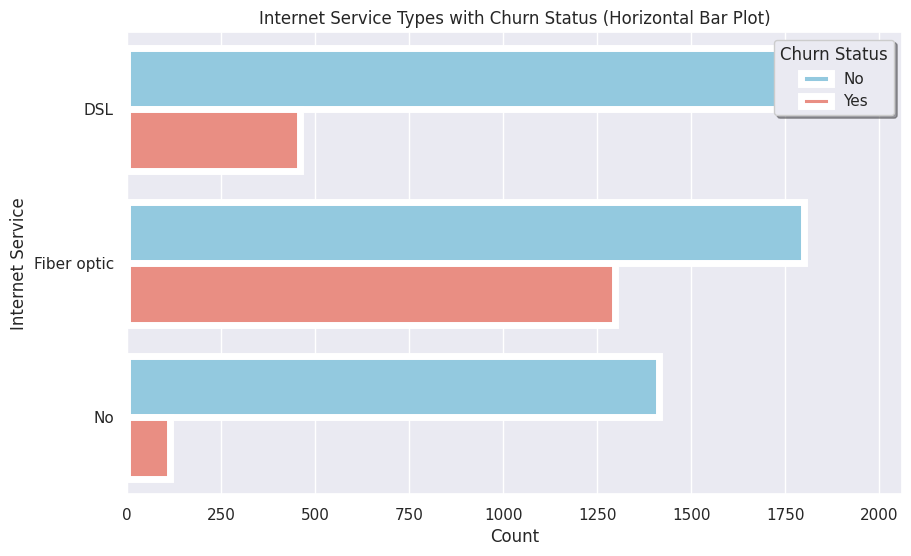

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='InternetService', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'salmon'])

plt.title('Internet Service Types with Churn Status (Horizontal Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Internet Service')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 9-what is our Contract types we provide? - names and ratio please-?

 # حساب عدد العملاء والنسبة المئوية لكل نوع من أنواع العقود


In [ ]:
contract_type_counts = data['Contract'].value_counts(normalize=True) * 100
print("Contract Types and their percentages:\n", contract_type_counts)

Contract Types and their percentages:
 Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


# رسم المخطط الدائري لتوزيع أنواع العقود


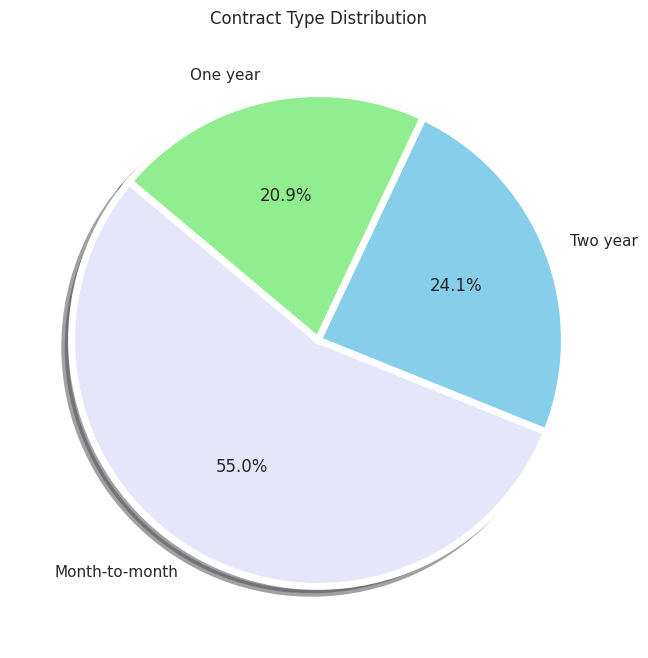

In [ ]:
plt.figure(figsize=(8, 8))
contract_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'skyblue', 'lightgreen'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':5})
plt.title('Contract Type Distribution')
plt.ylabel('')
plt.show()

# **مخطط القيم (Bar Plot):**


# توزيع العملاء حسب نوع العقد مع توضيح التراجع


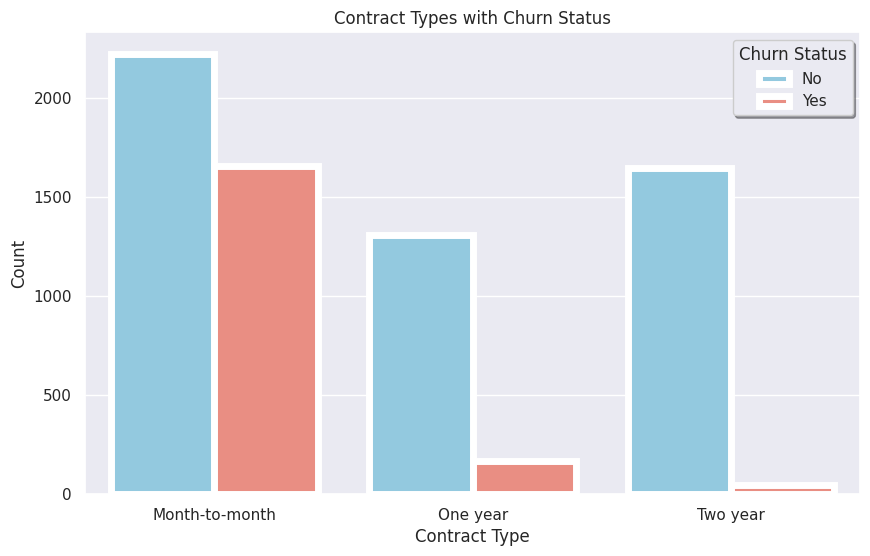

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Contract', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'salmon'])

plt.title('Contract Types with Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 10- how many customers uses StreamingTV ?

# حساب عدد العملاء حسب استخدام خدمة البث التلفزيوني


In [ ]:
streaming_tv_counts = data['StreamingTV'].value_counts()
print("Number of customers using StreamingTV:\n", streaming_tv_counts)

Number of customers using StreamingTV:
 StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


# رسم المخطط الدائري لتوزيع العملاء حسب استخدام خدمة البث التلفزيوني


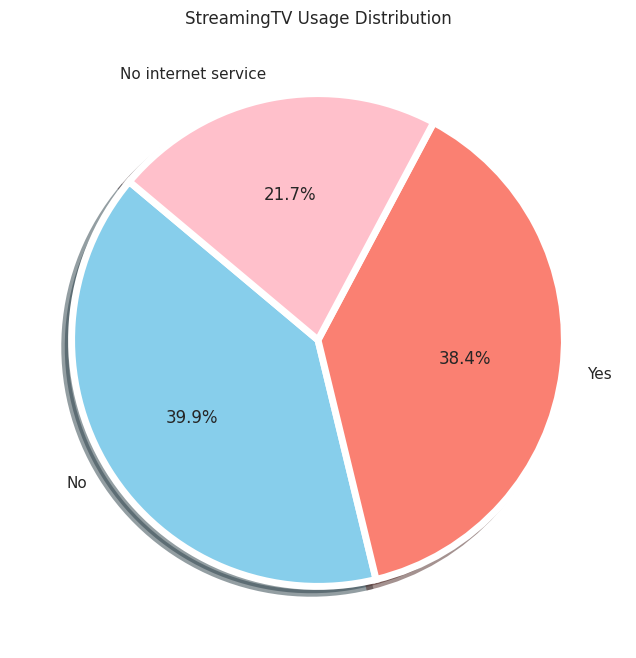

In [ ]:
plt.figure(figsize=(8, 8))
streaming_tv_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon','pink'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':5})
plt.title('StreamingTV Usage Distribution')
plt.ylabel('')
plt.show()

# **مخطط القيم (Bar Plot):**


# توزيع العملاء حسب استخدام خدمة البث التلفزيوني مع توضيح التراجع


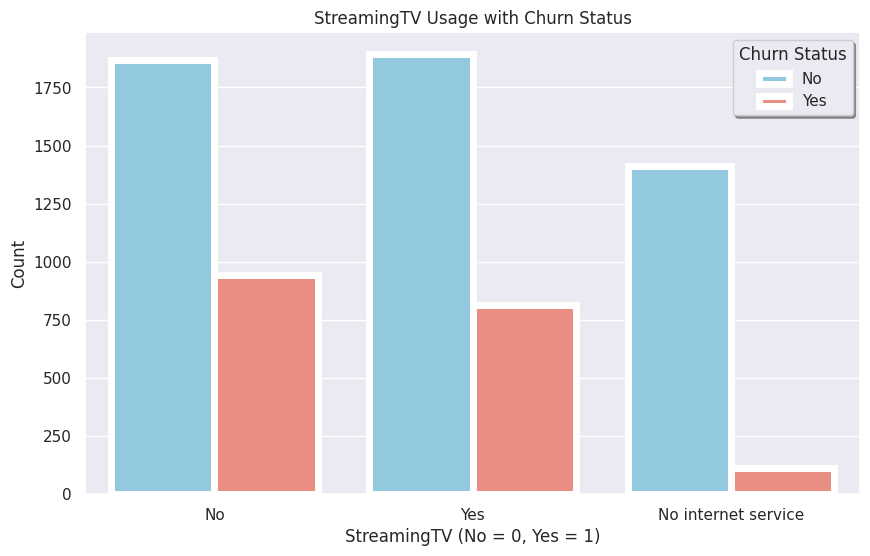

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='StreamingTV', hue='Churn', dodge=True, edgecolor='white', linewidth=5, palette=['skyblue', 'salmon'])

plt.title('StreamingTV Usage with Churn Status')
plt.xlabel('StreamingTV (No = 0, Yes = 1)')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# 11-- what is the ratio between users who streaming movies to StreamingTV subscribers ?

# حساب النسبة المئوية لمستخدمي StreamingMovies ضمن مستخدمي StreamingTV باستخدام crosstab


In [ ]:
streaming_crosstab = pd.crosstab(data['StreamingTV'], data['StreamingMovies'], normalize='index') * 100
print("Percentage of StreamingMovies users among StreamingTV users:\n", streaming_crosstab)

Percentage of StreamingMovies users among StreamingTV users:
 StreamingMovies             No  No internet service        Yes
StreamingTV                                                   
No                   71.814947                  0.0  28.185053
No internet service   0.000000                100.0   0.000000
Yes                  28.333949                  0.0  71.666051


# حساب عدد المستخدمين لكل حالة من StreamingTV و StreamingMovies

# رسم المخطط الدائري لتوزيع اشتراكات خدمات البث


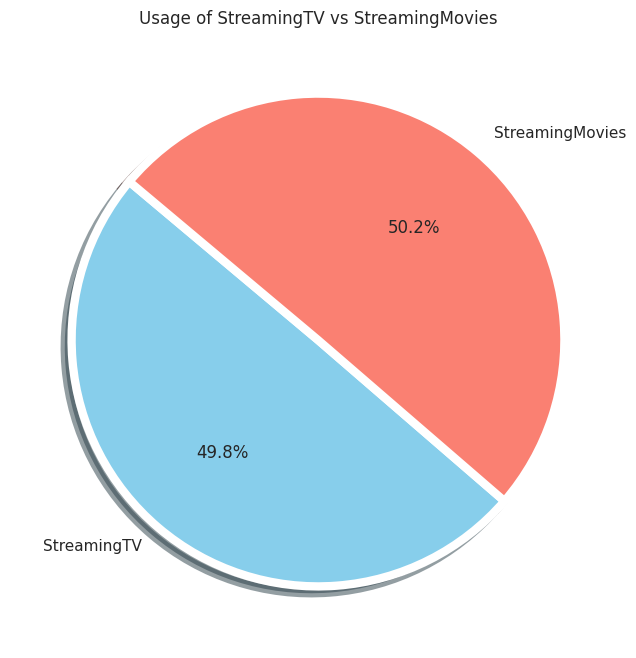

In [ ]:
streaming_counts = data[['StreamingTV', 'StreamingMovies']].apply(lambda x: (x == 'Yes').sum())

plt.figure(figsize=(8, 8))
streaming_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':6})
plt.title('Usage of StreamingTV vs StreamingMovies')
plt.ylabel('')
plt.show()

# **مخطط القيم (Bar Plot):**


# رسم مخطط الأعمدة لتوزيع العملاء حسب استخدام خدمات البث مع توضيح التراجع


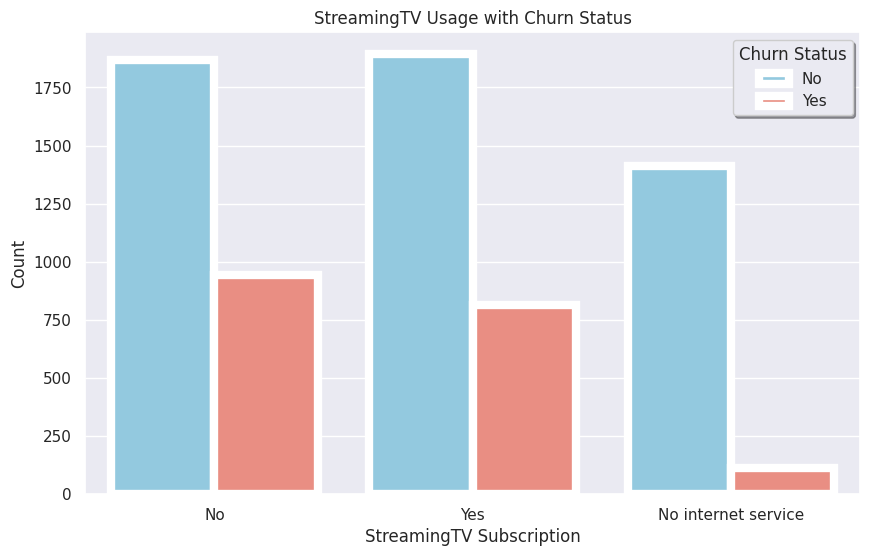

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='StreamingTV', hue='Churn', dodge=True, edgecolor='white', linewidth=6, palette=['skyblue', 'salmon'])

plt.title('StreamingTV Usage with Churn Status')
plt.xlabel('StreamingTV Subscription')
plt.ylabel('Count')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

#12- Is there a strong relationship between the monthly recharge rate and the dependents ?

# حساب متوسط الشحن الشهري حسب وجود المعالين


In [ ]:
dependents_monthly_charges = data.groupby('Dependents')['MonthlyCharges'].mean()
print("Average Monthly Charges by Dependents:\n", dependents_monthly_charges)

Average Monthly Charges by Dependents:
 Dependents
No     67.002808
Yes    59.522156
Name: MonthlyCharges, dtype: float64


# **Bar Plot :**


# رسم مخطط الأعمدة لمعدل الشحن الشهري حسب وجود المعالين وحالة التراجع


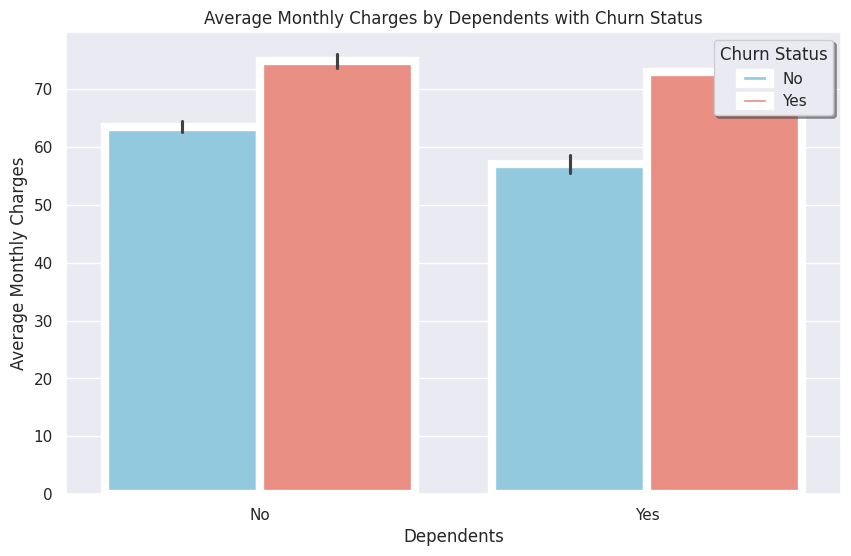

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Dependents', y='MonthlyCharges', hue='Churn', dodge=True, edgecolor='white', linewidth=6, palette=['skyblue', 'salmon'])

plt.title('Average Monthly Charges by Dependents with Churn Status')
plt.xlabel('Dependents')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

# **Scatter plot**

# رسم مخطط الانتشار لتوضيح العلاقة بين الشحن الشهري والمعالين


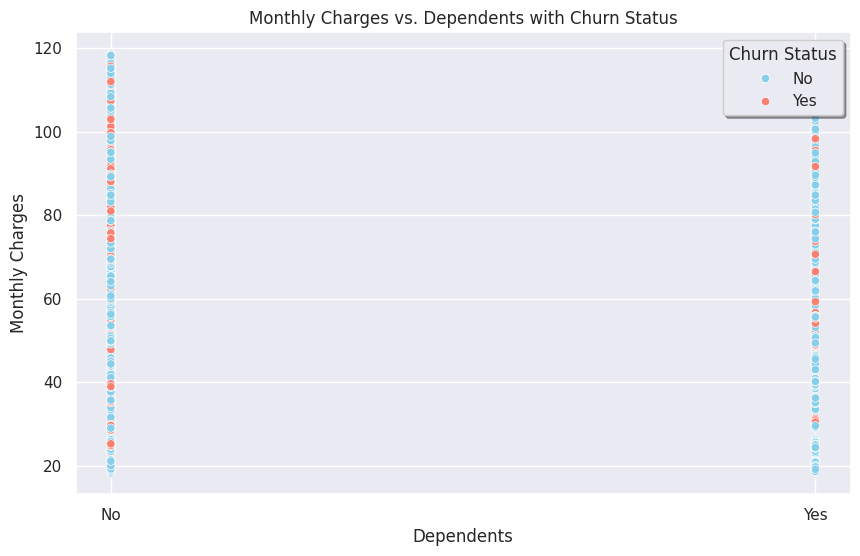

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Dependents', y='MonthlyCharges', hue='Churn', palette=['skyblue', 'salmon'], edgecolor='white', linewidth=0.5)

plt.title('Monthly Charges vs. Dependents with Churn Status')
plt.xlabel('Dependents')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn Status', shadow=True, loc='upper right')
plt.show()

#13-who is the the most important customer in the company according to Monthly and Total charges?

#  العميل الذي لديه أعلى رسوم إجمالية


In [ ]:
top_customer = data.loc[data['TotalCharges'].idxmax()]
print("Top Customer Details based on Total Charges:")
print(top_customer)

Top Customer Details based on Total Charges:
customerID                         2889-FPWRM
gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          117.8
TotalCharges                           8684.8
Churn                              

# **Bar Plot :**

# رسم مخطط الأعمدة للرسوم الشهرية والإجمالية للعميل الأعلى، مع خط يمثل المعدل الوسطي




<ipython-input-124-28e03ac97259>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MonthlyCharges', 'TotalCharges'], y=[top_customer['MonthlyCharges'], top_customer['TotalCharges']], palette=['lavender', 'skyblue'], linewidth=6)


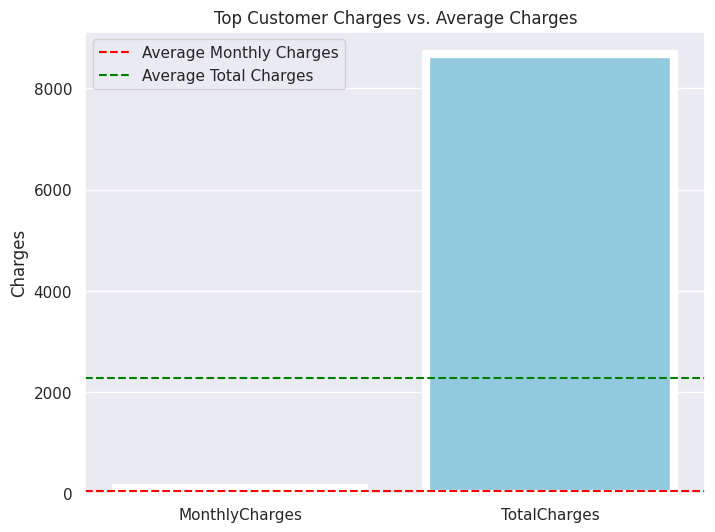

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['MonthlyCharges', 'TotalCharges'], y=[top_customer['MonthlyCharges'], top_customer['TotalCharges']], palette=['lavender', 'skyblue'], linewidth=6)

# خط المعدل الوسطي للرسوم الشهرية +الإجمالية
plt.axhline(y=data['MonthlyCharges'].mean(), color='red', linestyle='--', label='Average Monthly Charges')
plt.axhline(y=data['TotalCharges'].mean(), color='green', linestyle='--', label='Average Total Charges')

plt.title('Top Customer Charges vs. Average Charges')
plt.ylabel('Charges')
plt.legend()
plt.show()

# **Histogram**


# 1.    العثور على العميل الأكثر أهمية

# 2.      تمثيل توزيع الرسوم الشهرية

# 3.    تمثيل توزيع الرسوم الإجمالية

  




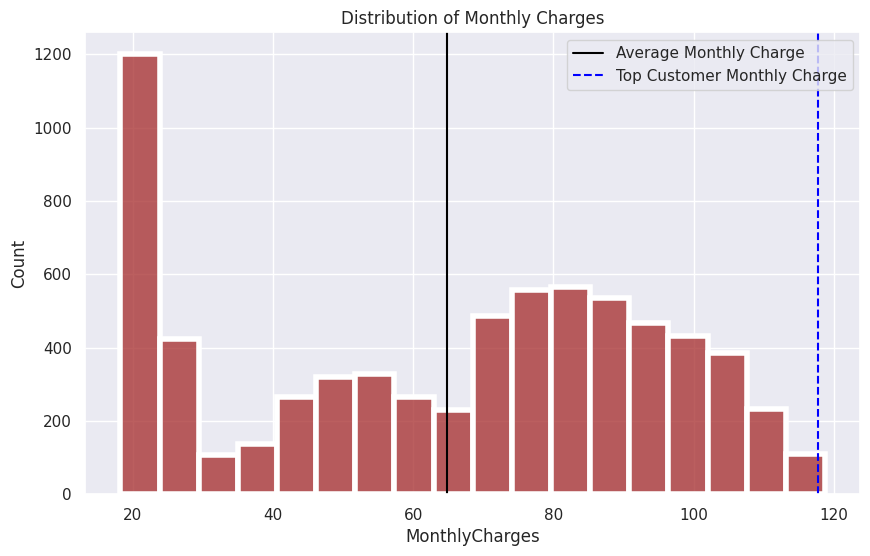

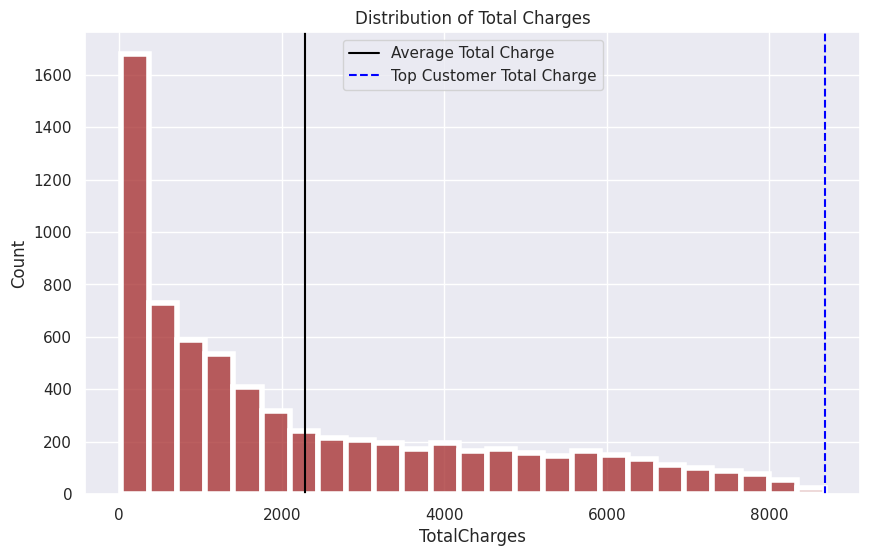

In [ ]:

top_customer = data.loc[data['TotalCharges'].idxmax()]

plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], color='brown', edgecolor='white', linewidth=4)
plt.axvline(data['MonthlyCharges'].mean(), color='black', label='Average Monthly Charge')
plt.axvline(top_customer['MonthlyCharges'], color='blue', label='Top Customer Monthly Charge', linestyle='--')
plt.title('Distribution of Monthly Charges')
plt.legend()

plt.figure(figsize=(10, 6))
sns.histplot(data['TotalCharges'], color='brown', edgecolor='white', linewidth=4)
plt.axvline(data['TotalCharges'].mean(), color='black', label='Average Total Charge')
plt.axvline(top_customer['TotalCharges'], color='blue', label='Top Customer Total Charge', linestyle='--')
plt.title('Distribution of Total Charges')
plt.legend()

plt.show()

# **Scatter Plot**

# رسم مخطط الانتشار للرسوم الشهرية والإجمالية لجميع العملاء مع تمييز العميل الأعلى




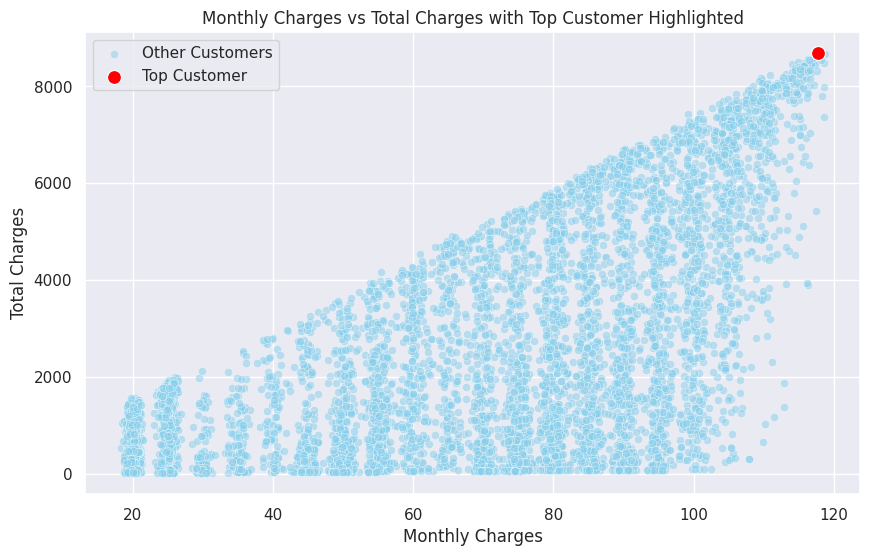

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', alpha=0.5, color='skyblue', label='Other Customers')
sns.scatterplot(x=[top_customer['MonthlyCharges']], y=[top_customer['TotalCharges']], color='red', s=100, label='Top Customer')

plt.title('Monthly Charges vs Total Charges with Top Customer Highlighted')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend()
plt.show()

#14- how many payment methods we provide? and what is the ratio between each others?

# حساب عدد ونسبة العملاء حسب طريقة الدفع


In [ ]:
payment_method_counts = data['PaymentMethod'].value_counts(normalize=True) * 100
print("Payment Methods and their percentages:\n", payment_method_counts)

Payment Methods and their percentages:
 PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64


#**Pie Plot**

# رسم المخطط الدائري لتوزيع طرق الدفع


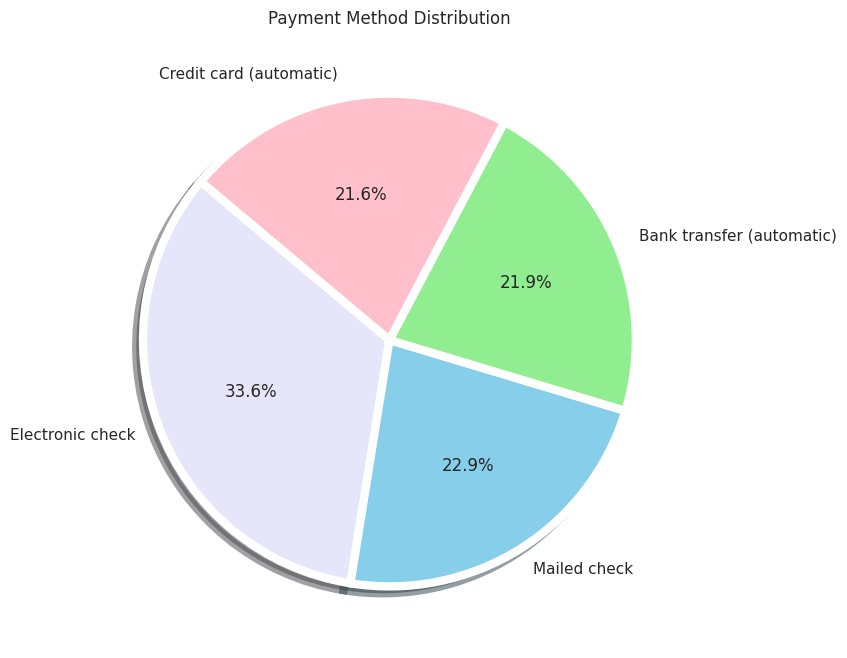

In [ ]:
plt.figure(figsize=(8, 8))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lavender', 'skyblue', 'lightgreen', 'pink'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':6})
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

## **Bar Plot**

# حساب متوسط الشحن الشهري

#  رسم مخطط Bar Plot للرسوم الشهرية حسب طرق الدفع مع توضيح حالة التراجع

#


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

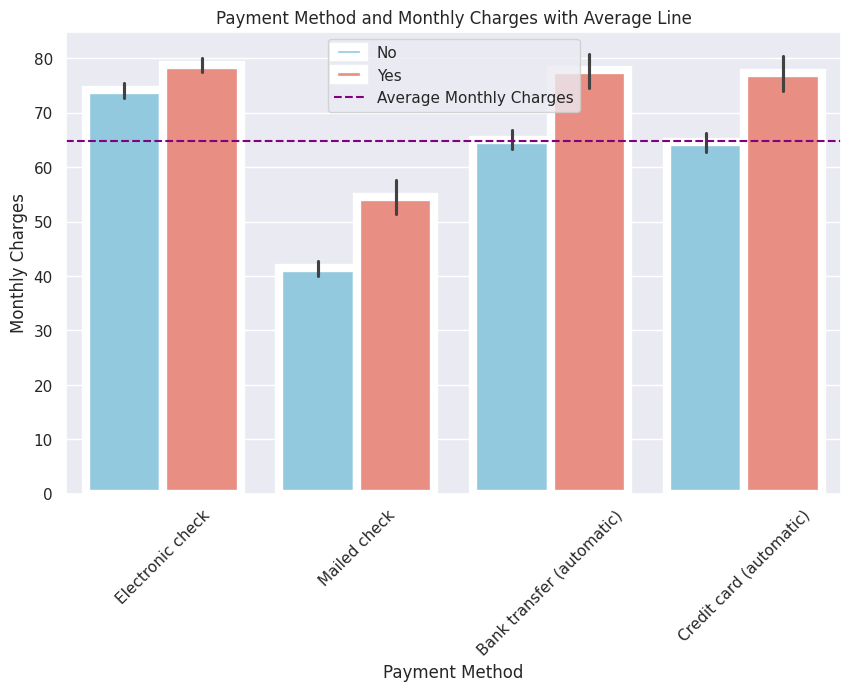

In [ ]:
monthly_charges_mean = data['MonthlyCharges'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='PaymentMethod', y='MonthlyCharges', hue='Churn', linewidth=6,edgecolor='white', palette=['skyblue', 'salmon'])

# خط  المعدل الوسطي للشحن الشهري
plt.axhline(y=monthly_charges_mean, color='purple', linestyle='--', label='Average Monthly Charges')

plt.title('Payment Method and Monthly Charges with Average Line')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.legend()
plt.xticks(rotation=45)

#15- what is our churn rate ?

# حساب معدل التراجع


In [ ]:
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# **Pie Chart**

# رسم المخطط الدائري لتوزيع التراجع


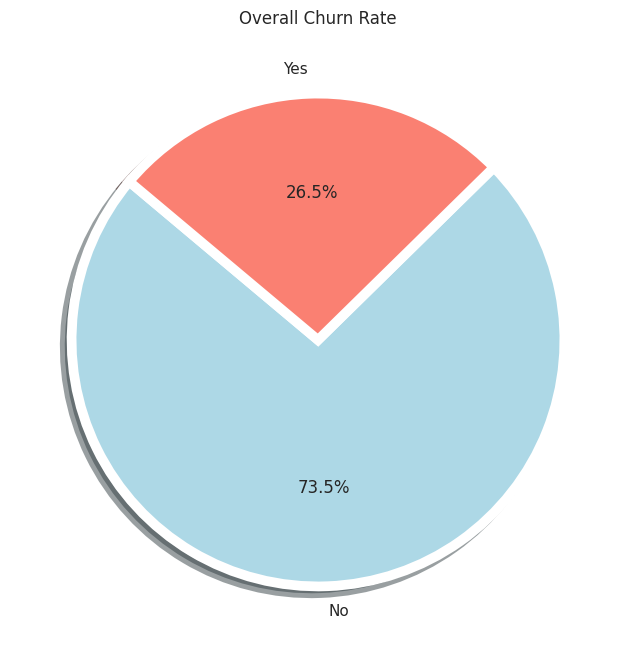

In [ ]:
plt.figure(figsize=(8, 8))
churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth':7})
plt.title('Overall Churn Rate')
plt.ylabel('')
plt.show()

# **Bar Plot**

# رسم مخطط الأعمدة لتوزيع التراجع حسب طرق الدفع وحالة التراجع


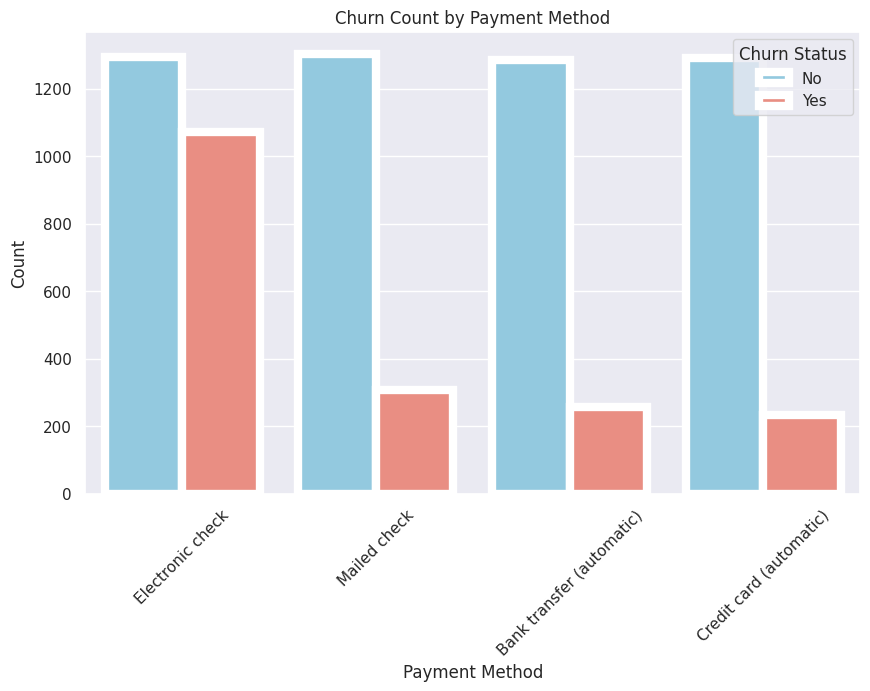

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PaymentMethod', hue='Churn', linewidth=6,edgecolor='white', palette=['skyblue', 'salmon'])

plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn Status')
plt.xticks(rotation=45)
plt.show()

#16- what is the average monthly charge ?

# حساب متوسط الرسوم الشهرية


In [ ]:
average_monthly_charge = data['MonthlyCharges'].mean()
print("Average Monthly Charge:", average_monthly_charge)

Average Monthly Charge: 64.76169246059918


# **Histogram**

# رسم مخطط التوزيع للرسوم الشهرية مع خط يمثل المتوسط


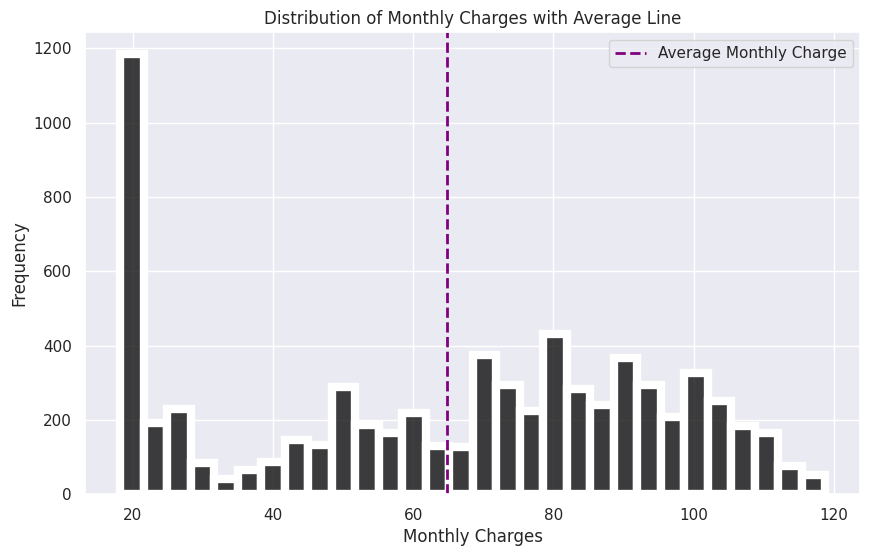

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, color='black', edgecolor='white', linewidth=6)

plt.axvline(x=average_monthly_charge, color='purple', linestyle='--', linewidth=2, label='Average Monthly Charge')

plt.title('Distribution of Monthly Charges with Average Line')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **Bar Plot**

# للرسوم الشهرية حسب حالة التراجع


<ipython-input-135-c0c5819257a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Churn', y='MonthlyCharges', palette=['salmon', 'skyblue'], edgecolor='white',linewidth=6)


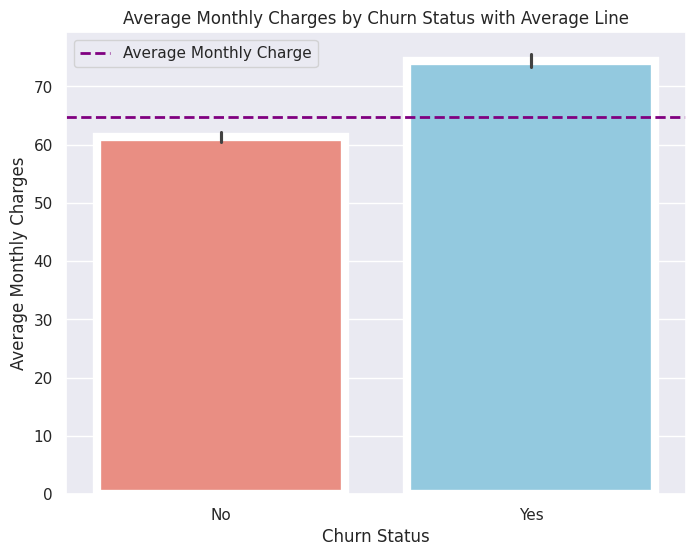

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Churn', y='MonthlyCharges', palette=['salmon', 'skyblue'], edgecolor='white',linewidth=6)

plt.axhline(y=average_monthly_charge, color='purple', linestyle='--', linewidth=2, label='Average Monthly Charge')

plt.title('Average Monthly Charges by Churn Status with Average Line')
plt.xlabel('Churn Status')
plt.ylabel('Average Monthly Charges')
plt.legend()
plt.show()

#17- From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate ?

# حساب مصفوفة الارتباط بين الأعمدة ==  كبار السن و معدل الشحن الشهري




In [ ]:
correlation_matrix = data[['SeniorCitizen', 'MonthlyCharges']].corr()
print("Correlation between Senior Citizen and Monthly Charges:\n", correlation_matrix)

Correlation between Senior Citizen and Monthly Charges:
                 SeniorCitizen  MonthlyCharges
SeniorCitizen        1.000000        0.220173
MonthlyCharges       0.220173        1.000000


# **Bar Plot**


# للرسوم الشهرية حسب حالة كبار السن مع توضيح حالة التراجع


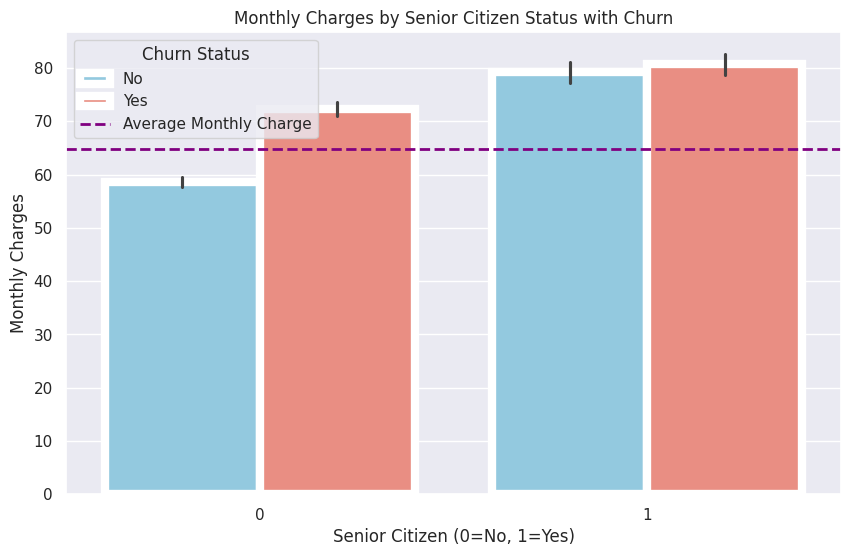

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='SeniorCitizen', y='MonthlyCharges', hue='Churn', palette=['skyblue', 'salmon'], edgecolor='white',linewidth=6)

average_monthly_charge = data['MonthlyCharges'].mean()
plt.axhline(y=average_monthly_charge, color='purple', linestyle='--', linewidth=2, label='Average Monthly Charge')

plt.title('Monthly Charges by Senior Citizen Status with Churn')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn Status')
plt.show()

# **Scatter Plot**


  # مخطط  بين كبار السن والرسوم الشهرية مع خط الانحدار

   



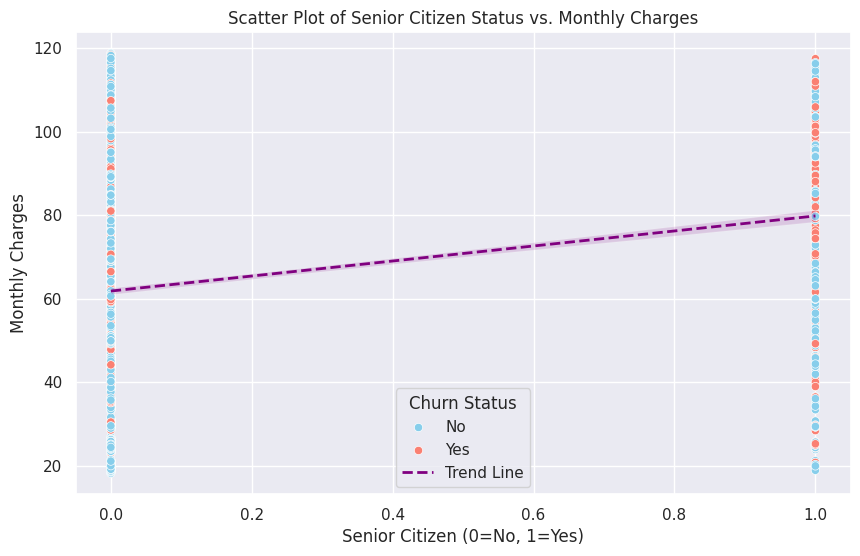

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='SeniorCitizen', y='MonthlyCharges', hue='Churn', palette=['skyblue', 'salmon'], edgecolor='white')

# خط الانحدار
sns.regplot(data=data, x='SeniorCitizen', y='MonthlyCharges', scatter=False, color='purple', line_kws={'linestyle': '--', 'linewidth': 2}, label='Trend Line')

plt.title('Scatter Plot of Senior Citizen Status vs. Monthly Charges')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn Status')
plt.show()

# • ارتباط إيجابي يعني أن كبار السن قد يميلون لدفع رسوم أعلى ربما بسبب اشتراكات في خدمات إضافية أو أعلى.

#18-  We want to give offers according to the monthly charge categories, can you explain that ?





   # 1. تقسيم الرسوم الشهرية إلى فئات: منخفضة، متوسطة، وعالية

   # 2. عرض عدد العملاء في كل فئة




In [ ]:
data['MonthlyChargesCategory'] = pd.cut(data['MonthlyCharges'], bins=[0, 35, 70, data['MonthlyCharges'].max()],
                                        labels=['Low', 'Medium', 'High'])

monthly_charge_counts = data['MonthlyChargesCategory'].value_counts()
print("Customer count by Monthly Charges Category:\n", monthly_charge_counts)

Customer count by Monthly Charges Category:
 MonthlyChargesCategory
High      3583
Low       1735
Medium    1725
Name: count, dtype: int64


# **Bar Plot**

#  للعملاء حسب فئات الرسوم الشهرية وحالة التراجع


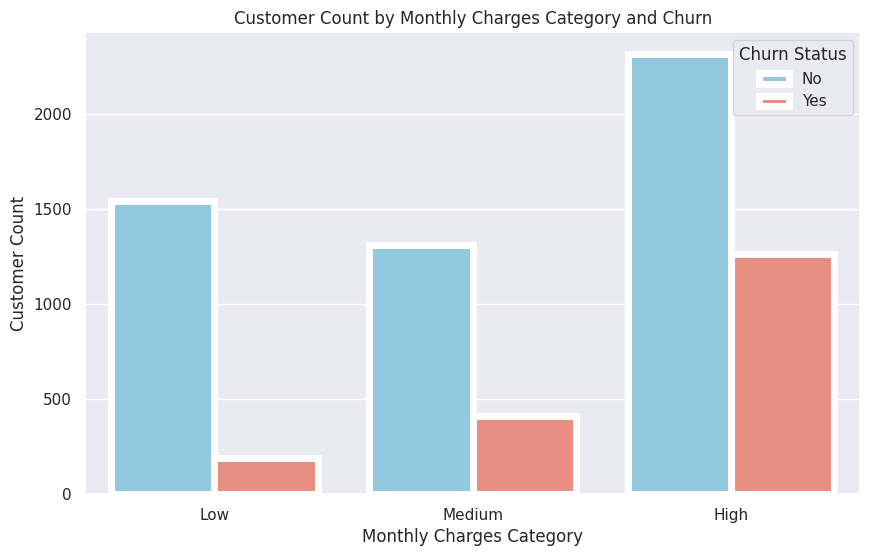

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MonthlyChargesCategory', hue='Churn', linewidth=5, palette=['skyblue', 'salmon'], edgecolor='white')

plt.title('Customer Count by Monthly Charges Category and Churn')
plt.xlabel('Monthly Charges Category')
plt.ylabel('Customer Count')
plt.legend(title='Churn Status')
plt.show()


#19- We want to present offers by gender and the Partner, could you explain that?

# حساب عدد العملاء حسب الجنس وحالة الشريك


In [ ]:
gender_partner_counts = data.groupby(['gender', 'Partner']).size().unstack()
print("Customer count by Gender and Partner Status:\n", gender_partner_counts)

Customer count by Gender and Partner Status:
 Partner    No   Yes
gender             
Female   1800  1688
Male     1841  1714


# **Bar Plot**

#  للعملاء حسب الجنس وحالة الشريك


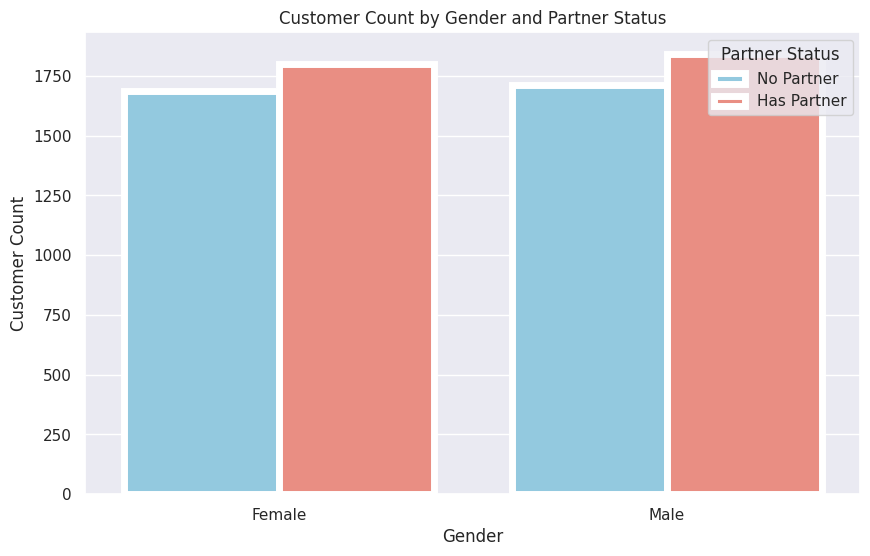

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='Partner', palette=['skyblue', 'salmon'], edgecolor='white', linewidth=5)

plt.title('Customer Count by Gender and Partner Status')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Partner Status', labels=['No Partner', 'Has Partner'])
plt.show()

#**Bar Plot**

# للعملاء حسب الجنس وحالة الشريك وحالة التراجع


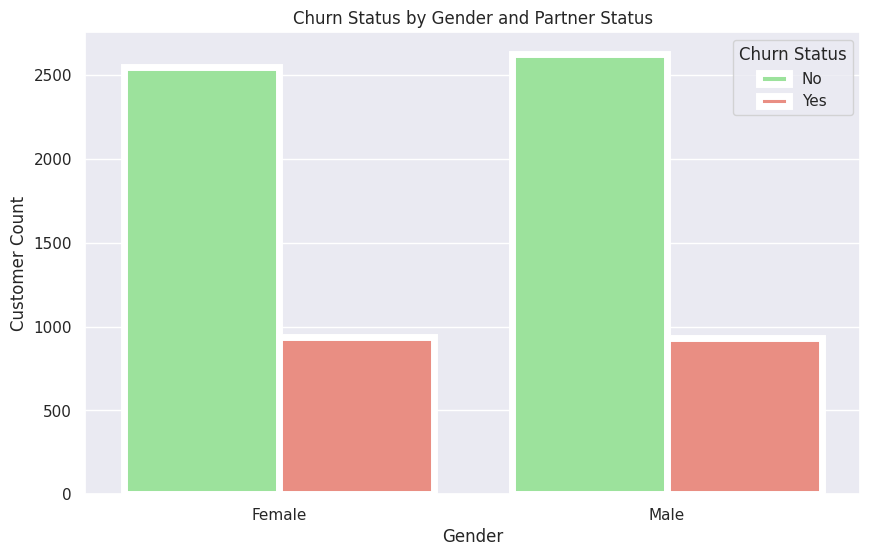

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='Churn', palette=['lightgreen', 'salmon'], edgecolor='white', linewidth=5)

plt.title('Churn Status by Gender and Partner Status')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Churn Status')
plt.show()

#**`By Rasha  Alzahr`**